In [26]:
import numpy as np
import cv2
import glob
import pickle
import matplotlib.pyplot as plt

In [27]:
# prepare object points like (0,0,0),(1,0,0),...(0,5,0)
objp = np.zeros((6*9,3),np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

In [28]:
# arrays to store object points and image points from all the images

In [29]:
objpoints = []
imgpoints = []

In [34]:
# make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')
print(images)

['camera_cal\\calibration1.jpg', 'camera_cal\\calibration10.jpg', 'camera_cal\\calibration11.jpg', 'camera_cal\\calibration12.jpg', 'camera_cal\\calibration13.jpg', 'camera_cal\\calibration14.jpg', 'camera_cal\\calibration15.jpg', 'camera_cal\\calibration16.jpg', 'camera_cal\\calibration17.jpg', 'camera_cal\\calibration18.jpg', 'camera_cal\\calibration19.jpg', 'camera_cal\\calibration2.jpg', 'camera_cal\\calibration20.jpg', 'camera_cal\\calibration3.jpg', 'camera_cal\\calibration4.jpg', 'camera_cal\\calibration5.jpg', 'camera_cal\\calibration6.jpg', 'camera_cal\\calibration7.jpg', 'camera_cal\\calibration8.jpg', 'camera_cal\\calibration9.jpg']


working on camera_cal\calibration10.jpg
working on camera_cal\calibration11.jpg
working on camera_cal\calibration12.jpg
working on camera_cal\calibration13.jpg
working on camera_cal\calibration14.jpg
working on camera_cal\calibration15.jpg
working on camera_cal\calibration16.jpg
working on camera_cal\calibration17.jpg
working on camera_cal\calibration18.jpg
working on camera_cal\calibration19.jpg
working on camera_cal\calibration2.jpg
working on camera_cal\calibration20.jpg
working on camera_cal\calibration3.jpg
working on camera_cal\calibration6.jpg
working on camera_cal\calibration7.jpg
working on camera_cal\calibration8.jpg
working on camera_cal\calibration9.jpg
1280 720
[[1.15777930e+03 0.00000000e+00 6.67111054e+02]
 [0.00000000e+00 1.15282291e+03 3.86128938e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]] [[-0.24688775 -0.02373133 -0.00109842  0.00035108 -0.00258571]]


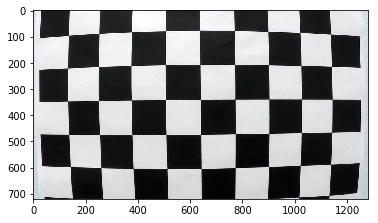

In [41]:
# step through the list and search for chessboard corners
for idx,fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    #find the chessboard corners
    ret,corners = cv2.findChessboardCorners(gray,(9,6),None)
    
    #If found, add object points, image points
    
    if ret == True:
        print('working on',fname)
        objpoints.append(objp)
        imgpoints.append(corners)
        
        #Draw and display the corners
        cv2.drawChessboardCorners(img,(9,6),corners,ret)
        write_name = 'corners_found'+str(idx)+'.jpg'
        cv2.imwrite(write_name,img)

       
# load image for reference

img = cv2.imread('camera_cal/calibration1.jpg')
img_size = (img.shape[1],img.shape[0])
plt.imshow(img)
print(img.shape[1],img.shape[0])
# do camera calibraition given object points and image points 
ret,mtx,dist,rvecs,tvecs = cv2.calibrateCamera(objpoints,imgpoints,img_size,None,None)

print(mtx,dist)
        

In [37]:
# save the camera calibration result for later use (we won't worry about rvecs/tvecs)

In [46]:
dist_pickle = {}
dist_pickle['mtx'] = mtx
dist_pickle['dist'] = dist
pickle.dump(dist_pickle,open("calibration_pickle.p","wb"))
